# ex1 triangular distribution

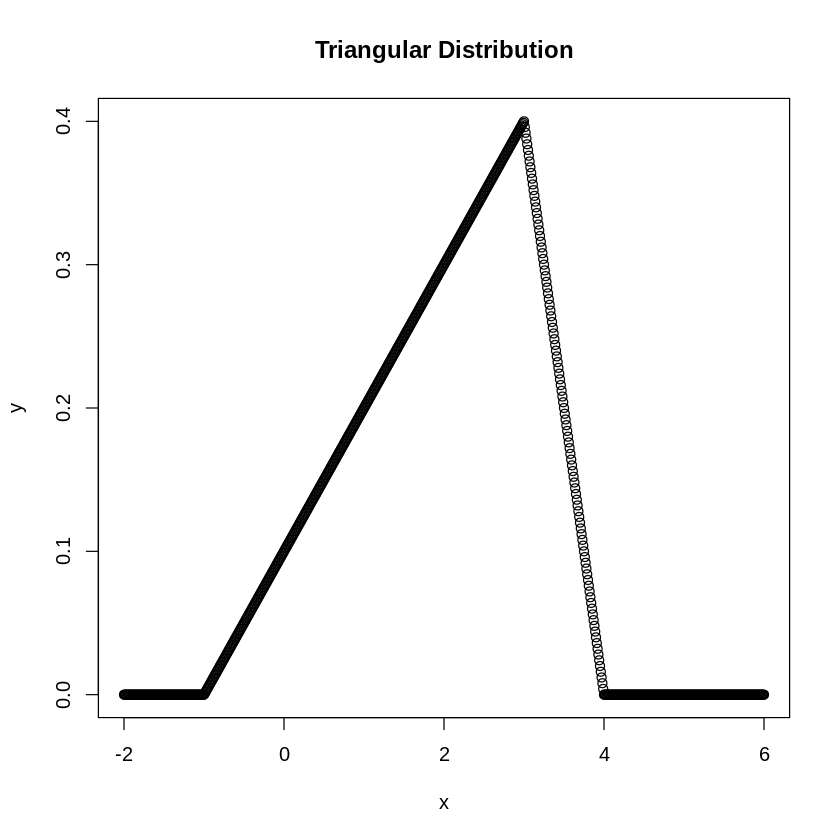

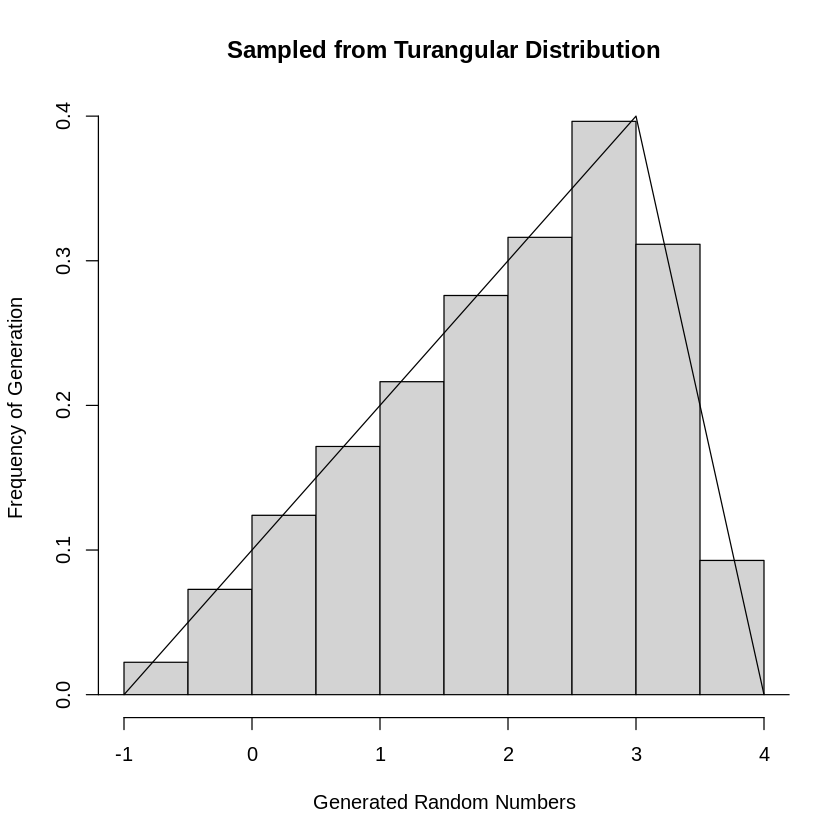

In [11]:
fun <- function(a,b,c,xi){
    ans <- vector()
    x <- seq(a,b,0.01)
    #c <- a + ((b-a)/2)
    #for (xi in x){
        if(a<=xi & xi<c){
            ans <- c(ans,(2*(xi-a)) / ((b-a)*(c-a)))
        }
        else if (c<=xi & xi<=b){
            ans <- c(ans,(2*(b-xi)) / ((b-a)*(b-c)))
        }
        else{ans <- c(ans,0)}
    #}
    return(ans)
}

a <- -1
b <- 4
c <- 3
x <- seq(-2,6,0.01)
y <- vector()
for (xi in x){
    y <- c(y,fun(a,b,c,xi))
}


plot(x,y, main = 'Triangular Distribution')

rfun <- function(n){
    rfuns <- vector()
    hit <- 0
    while (hit<n) {
        rx = runif(n=1,min = -2, max = 6)
        ry = runif(n=1,min = 0, max = 0.45)#max(y))
        if (ry<fun(a,b,c,rx)){
            hit <- hit+1
            rfuns <- c(rfuns,rx)
        }
    }
    return(rfuns)
}

hist <- hist(rfun(10^4), freq = FALSE ,xlab = 'Generated Random Numbers',ylab = 'Frequency of Generation',main = 'pdf Sampled from Turangular Distribution')
lines(x,y)

# ex 2 Markov Inequality

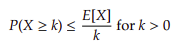

The markov inequality applies to EVERY distribution. It is useful because you don't need to know the shape of the distribution for it to apply. It shows the highest possible probability that X (a value in the set X) is greater than x (some possible value of the set). e.g. What is the highest possibility that the next iphone screen is larger than 6inches? Use the Markov Inequality. 


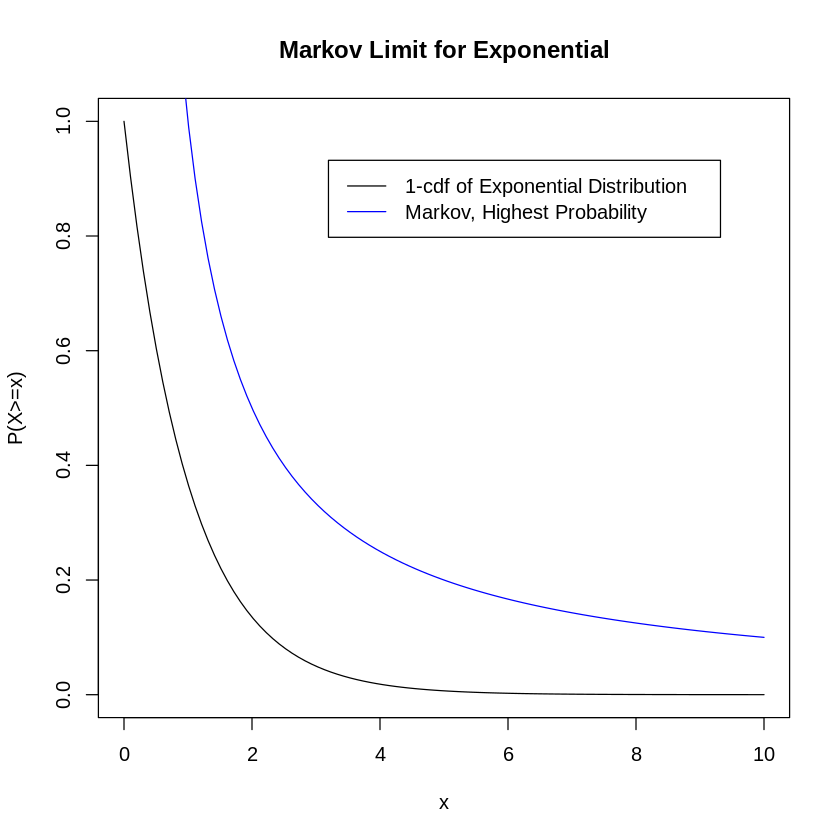

In [26]:
x <- seq(0,10,length.out = 100)
#lambda = 1
PXgtx = 1 - pexp(x, rate = 1)
#expectation of the exponetial is 1/lambda = 1
markov <- 1/x

plot(x,PXgtx, type = 'l', xlab = "x", ylab = "P(X>=x)", main = "Markov Limit for Exponential")
lines(x,markov,col = 'blue')
legend("topright", 
       inset=0.1, 
       legend=c("1-cdf of Exponential Distribution","Markov, Highest Probability"),
       col=c("black", "Blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)


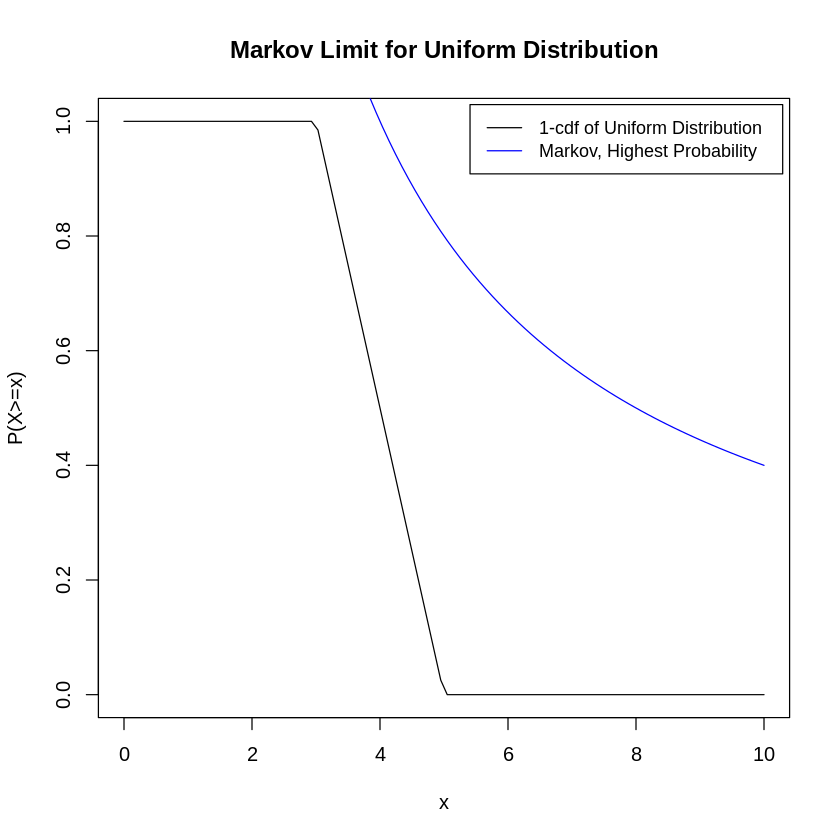

In [38]:
uniform <- 1 - punif(x,3,5)

#expectation of a uniform distribution is max + min / 2 = 4, thus markov id the same as before
markov <- 4/x
plot(x,uniform,type = 'l', xlab = "x", ylab = "P(X>=x)", main = "Markov Limit for Uniform Distribution")
lines(x,markov,col = 'blue')
legend("topright", 
       inset=0.01, 
       legend=c("1-cdf of Uniform Distribution","Markov, Highest Probability"),
       col=c("black", "Blue"), 
       lty=1:1, 
       cex=0.9,
       box.lty=1)

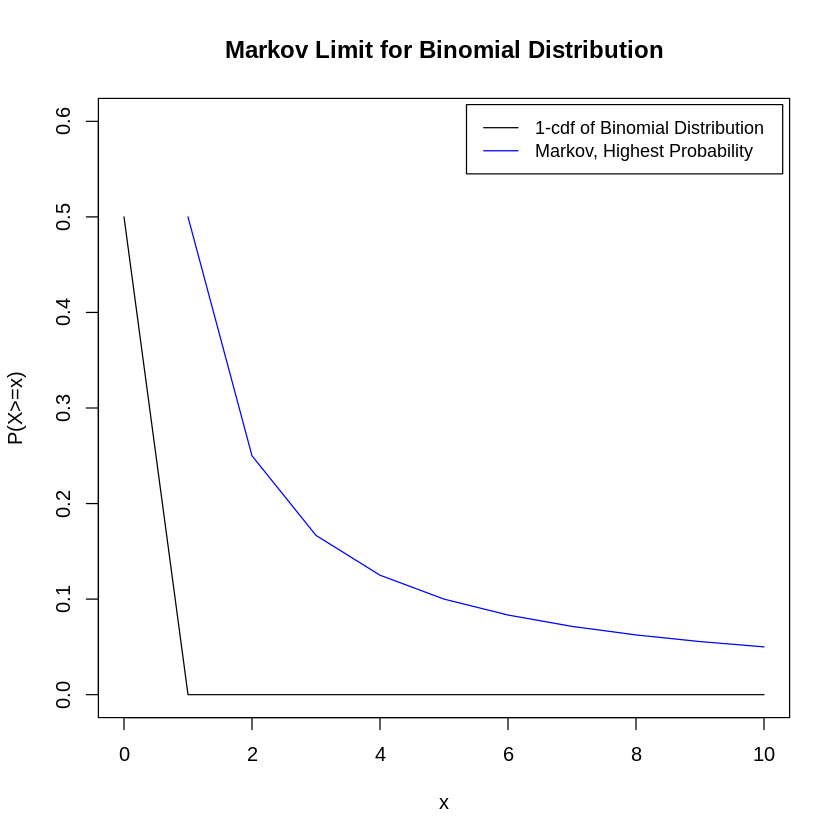

In [45]:
x <- 0:10
binomial <- 1 - pbinom(x,size = 1,prob = 1/2)

#expectation of a binomial is np.
markov <- 0.5/x
plot(x,binomial,type = 'l', xlab = "x", ylab = "P(X>=x)", main = "Markov Limit for Binomial Distribution",
    ylim = c(0,0.6))
lines(x,markov,col = 'blue')
legend("topright", 
       inset=0.01, 
       legend=c("1-cdf of Binomial Distribution","Markov, Highest Probability"),
       col=c("black", "Blue"), 
       lty=1:1, 
       cex=0.9,
       box.lty=1)

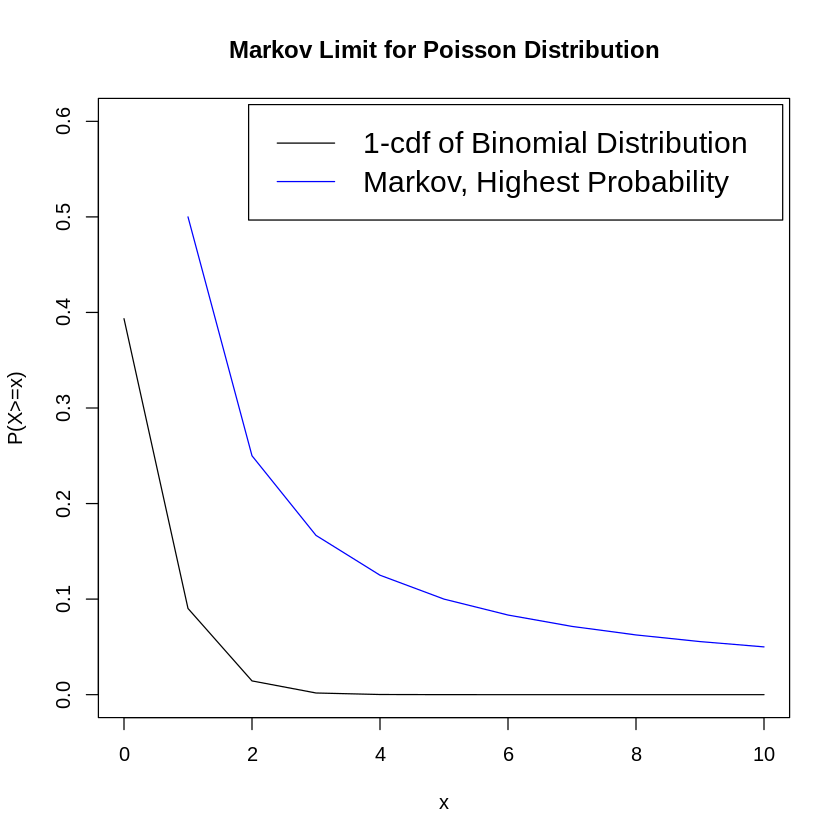

In [56]:
x <- 0:10
poisson <- 1 - ppois(x,1/2)

#expectation of a poisson is lambda.
markov <- 0.5/x
plot(x,poisson,type = 'l', xlab = "x", ylab = "P(X>=x)", main = "Markov Limit for Poisson Distribution",
    ylim = c(0,0.6))
lines(x,markov,col = 'blue')
legend("topright", 
       inset=0.01, 
       legend=c("1-cdf of Poisson Distribution","Markov, Highest Probability"),
       col=c("black", "Blue"), 
       lty=1:1, 
       cex=1.5,
       box.lty=1)

# ex3 Chebyshevs Inequality

## Normal

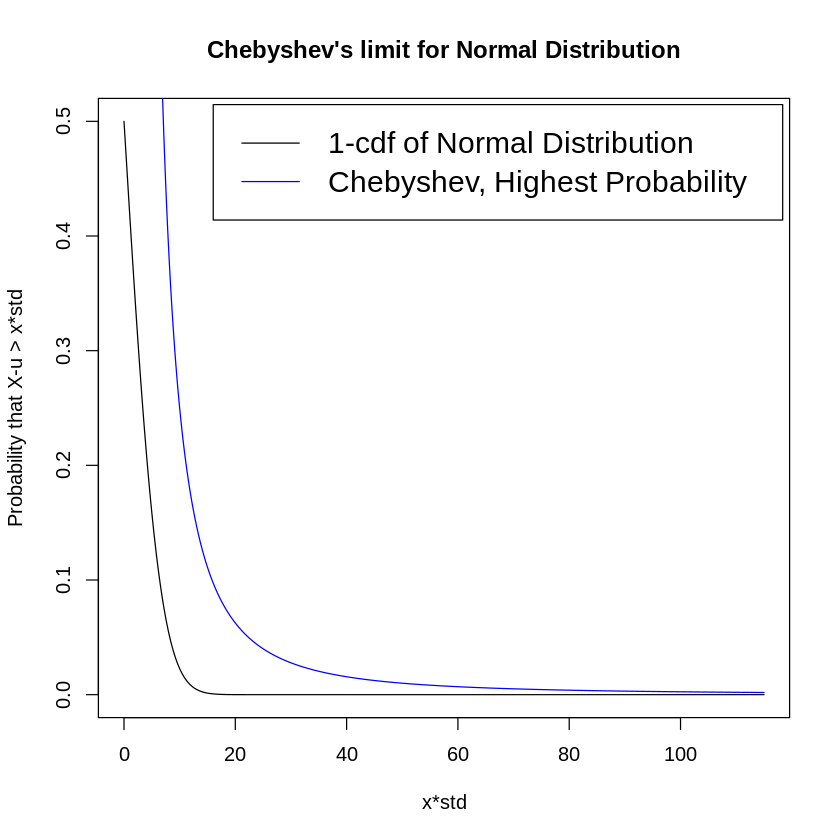

In [27]:
#Normal Distribution

#by only looking at +ve x values we ensure to look at the difference fom the mean. Because this is the same on both sides of the normal distribution.
x <- seq(0,23,0.01)
xstd <- x*5
# mean 3, std 5, asked by question
# setting the mean to 0 is the equivilant of looking at the disntance of X from the mean.
normal <- dnorm(xstd,0,5)
PXgtxstd <- 1 - pnorm(xstd,0,5)

cheb <- 1/(x^2)

#plot the Probability that X > x*std, Since the mean is 0, X = X-mean. Chebyshevs states this is always less than 1/x^2
plot(xstd,PXgtxstd, type = 'l', xlab = 'x*std' , ylab = 'Probability that X-u > x*std', main = "Chebyshev's limit for Normal Distribution")
#plot the Chebyshev max probability of 1/x^2 for every x*std value
lines(xstd, cheb, col = 'blue')

legend("topright", 
       inset=0.01, 
       legend=c("1-cdf of Normal Distribution","Chebyshev, Highest Probability"),
       col=c("black", "Blue"), 
       lty=1:1, 
       cex=1.5,
       box.lty=1)

## Exponential

Chebyshev's inequality states that

$$P(|X-u| > k\sigma) \leq \frac{1}{k^2}$$

For the exponential distribution of rate parameter $\lambda = 1$ the mean is $\frac{1}/{\lambda} = 1$
The standard deviation $\sigma$ is given as $\frac{1}/{\lambda^2} = 1$

Thus chebyshev's inequality becomes,
$$P(|X-1| > k) \leq \frac{1}{k^2}$$,

where,
$$P(|X-1| > k) = P(X > k+1)$$

The exponential is always positive so the absolute vaule is not necessary to be considered.

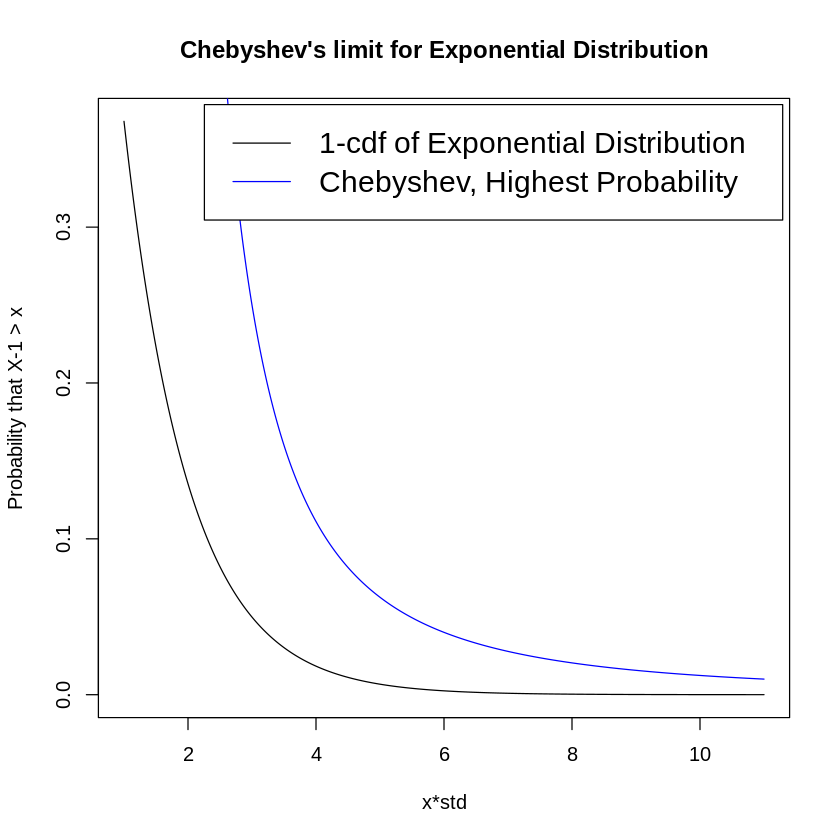

In [28]:
#Exponential Distrobution


#lambda = 1
#expect = 1/lambda = 1

#var = 1/lambda^2, std = sqrt(var), std = 1/lambda = 1
x <- seq(0,10,0.01)
#because std = 1
xstd <- x
xstd1 <- xstd + 1
# mean 3, std 5, asked by question
# setting the mean to 0 is the equivilant of looking at the disntance of X from the mean.
exponential <- dexp(xstd,1)
PXgtxstd1 <- 1 - pexp(xstd1,1)

cheb <- 1/(x^2)

#plot the Probability that X > x*std, Since the mean is 0, X = X-mean. Chebyshevs states this is always less than 1/x^2
plot(xstd1,PXgtxstd1, type = 'l', xlab = 'x*std' , ylab = 'Probability that X-1 > x', main = "Chebyshev's limit for Exponential Distribution")
#plot the Chebyshev max probability of 1/x^2 for every x*std value
lines(xstd1, cheb, col = 'blue')
legend("topright", 
       inset=0.01, 
       legend=c("1-cdf of Exponential Distribution","Chebyshev, Highest Probability"),
       col=c("black", "Blue"), 
       lty=1:1, 
       cex=1.5,
       box.lty=1)

# uniform distribution

For a uniform distribution from 1-root(2) to 1+ root(2) the mean is 1 and standard deviation root(1/3)

$$P(|X-u| > k\sigma) \leq \frac{1}{k^2}$$

becomes

$$P\left(|X-1| > k\sqrt{\frac{1}{3}}\right) \leq \frac{1}{k^2}$$

and similarly as before

$$P\left(|X-1| > k\sqrt{\frac{1}{3}}\right) = P\left(X > |k|\sqrt{\frac{1}{3}}+1\right)$$



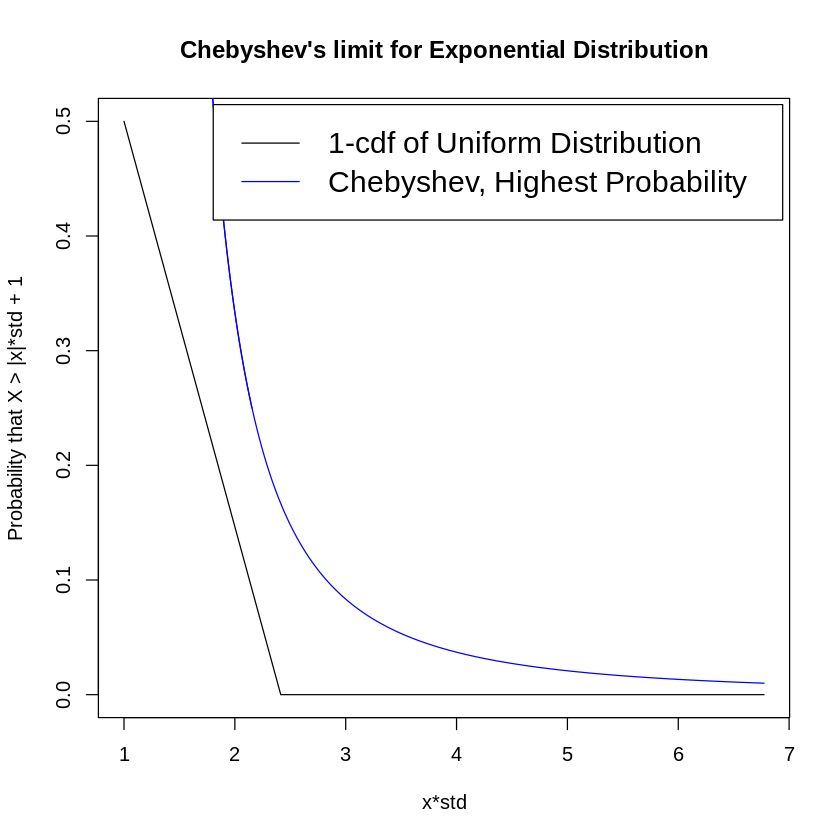

In [33]:
#Uniform Distrobution


#min = 1-sqrt(2)
#max = 1+sqrt(2)
# expectation = 1
std <- sqrt(1/3)
#var = 1/lambda^2, std = sqrt(var), std = 1/lambda = 1
x <- seq(-2,10,0.01)
#because std = 1
xstd <- x
modxstd1 <- abs(x)*std + 1

PXgtmodxstd1 <- 1 - punif(modxstd1,1-sqrt(2),1+sqrt(2))

cheb <- 1/(x^2)

#plot the Probability that X > x*std, Since the mean is 0, X = X-mean. Chebyshevs states this is always less than 1/x^2
plot(modxstd1,PXgtmodxstd1, type = 'l', xlab = 'x*std' , ylab = 'Probability that X > |x|*std + 1', main = "Chebyshev's limit for Exponential Distribution")
#plot the Chebyshev max probability of 1/x^2 for every x*std value
lines(modxstd1, cheb, col = 'blue')
legend("topright", 
       inset=0.01, 
       legend=c("1-cdf of Uniform Distribution","Chebyshev, Highest Probability"),
       col=c("black", "Blue"), 
       lty=1:1, 
       cex=1.5,
       box.lty=1)

# ex4 6 toy box model

In [2]:
# boxes H0 H1 H2 H3 H4 H5
# xxxxx xxxx0 xxx00 xx000 x0000 00000
#the bead extracted, 0 for white 1 for black
ext <- 0

H0 <- function(ext){
    if (ext == 0){return(0)}
    else if (ext == 1){return(1)}
    else{#print('ext must be 1 or 0')
        return(NA)}
}
H1 <- function(ext){
    if (ext == 0){return(1/5)}
    else if (ext == 1){return(4/5)}
    else{#print('ext must be 1 or 0')
        return(NA)}
}
H2 <- function(ext){
    if (ext == 0){return(2/5)}
    else if (ext == 1){return(3/5)}
    else{#print('ext must be 1 or 0')
        return(NA)}
}
H3 <- function(ext){
    if (ext == 0){return(3/5)}
    else if (ext == 1){return(2/5)}
    else{#print('ext must be 1 or 0')
         return(NA)}
}
H4 <- function(ext){
    if (ext == 0){return(4/5)}
    else if (ext == 1){return(1/5)}
    else{#print('ext must be 1 or 0')
         return(NA)}
}
H5 <- function(ext){
    if (ext == 0){return(1)}
    else if (ext == 1){return(0)}
    else{#print('ext must be 1 or 0')
         return(NA)}
}



What bead have you selected? 0 for white and 1 for black. (q to exit)1
PH0:  0.3333333   PH1:  0.2   PH2:  0.1442308   PH3:  0.0980577   PH4:  0.05109119   PH5:  0

What bead have you selected? 0 for white and 1 for black. (q to exit)1
PH0:  0.529678   PH1:  0.1937849   PH2:  0.1054465   PH3:  0.04918778   PH4:  0.01313622   PH5:  0

What bead have you selected? 0 for white and 1 for black. (q to exit)1
PH0:  0.6876469   PH1:  0.1670118   PH2:  0.06976848   PH3:  0.02222122   PH4:  0.003003825   PH5:  0

What bead have you selected? 0 for white and 1 for black. (q to exit)1
PH0:  0.7880376   PH1:  0.1373174   PH2:  0.0440995   PH3:  0.00951821   PH4:  0.0006468468   PH5:  0

What bead have you selected? 0 for white and 1 for black. (q to exit)1
PH0:  0.8489151   PH1:  0.1110572   PH2:  0.02732996   PH3:  0.003973804   PH4:  0.0001353409   PH5:  0

What bead have you selected? 0 for white and 1 for black. (q to exit)1
PH0:  0.8881952   PH1:  0.08928722   PH2:  0.01677303   PH3:  0.001

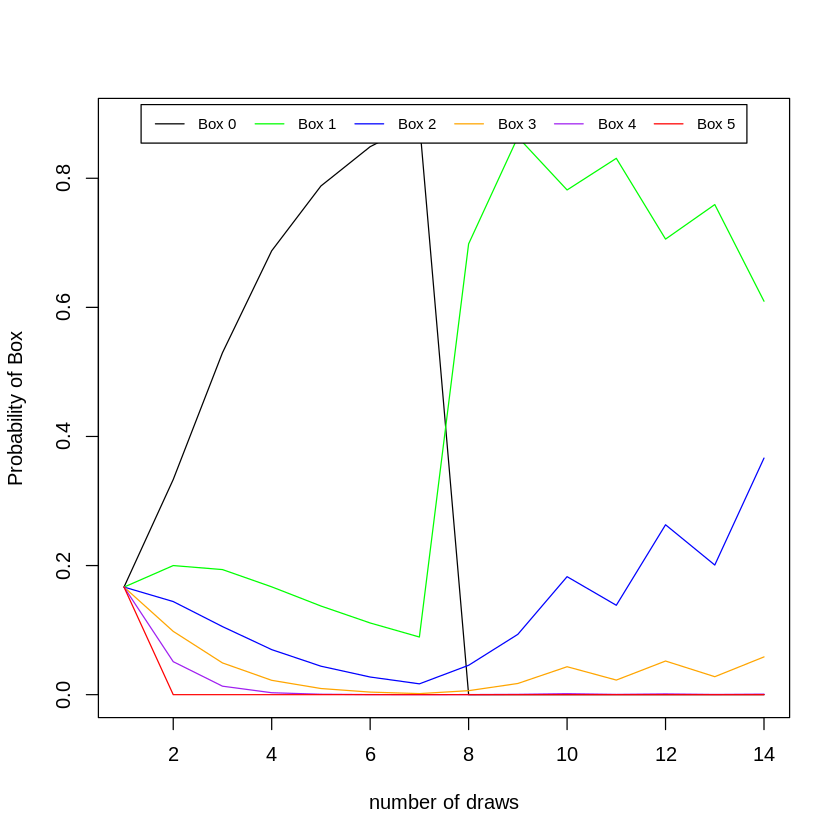

In [2]:
PH0 <- 1/6
PH1 <- 1/6
PH2 <- 1/6
PH3 <- 1/6
PH4 <- 1/6
PH5 <- 1/6

vPH0 <- vector()
vPH1 <- vector()
vPH2 <- vector()
vPH3 <- vector()
vPH4 <- vector()
vPH5 <- vector()


ext <- 0
vext <- vector()
step <- 0

while (ext != 'q'){
    vPH0 <- c(vPH0,PH0)
    vPH1 <- c(vPH1,PH1)
    vPH2 <- c(vPH2,PH2)
    vPH3 <- c(vPH3,PH3)
    vPH4 <- c(vPH4,PH4)
    vPH5 <- c(vPH5,PH5)
    
    step <- step + 1
    ext <- readline(prompt='\n\nWhat bead have you selected? 0 for white and 1 for black. (q to exit)')
    vext <- c(vext,ext)
    PH0 <- H0(ext)*PH0/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
    cat("PH0: ",PH0)
    PH1 <- H1(ext)*PH1/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
    cat("   PH1: ",PH1) 
    PH2 <- H2(ext)*PH2/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
    cat("   PH2: ",PH2)
    PH3 <- H3(ext)*PH3/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
    cat("   PH3: ",PH3)
    PH4 <- H4(ext)*PH4/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
    cat("   PH4: ",PH4)
    PH5 <- H5(ext)*PH5/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
    cat("   PH5: ",PH5)
    
    flush.console()
}

plot(1:step,vPH0,type = 'l', col = 'black',xlab = 'number of draws',ylab = 'Probability of Box')
lines(1:step,vPH1, col = 'green')
lines(1:step,vPH2, col = 'blue')
lines(1:step,vPH3, col = 'orange')
lines(1:step,vPH4, col = 'purple')
lines(1:step,vPH5, col = 'red')

print("\nThe draws in order are:\n")
print(vext)

legend("top", 
       inset=0.01, 
       legend=c("Box 0","Box 1","Box 2","Box 3","Box 4","Box 5"),
       col=c("black", "green", 'blue', 'orange', 'purple','red'), 
       lty=1:1, 
       cex=0.75,
       box.lty=1,
       horiz = TRUE)


[1] "\nThe draws in order are:\n"
  [1] 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0
 [38] 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 [75] 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0


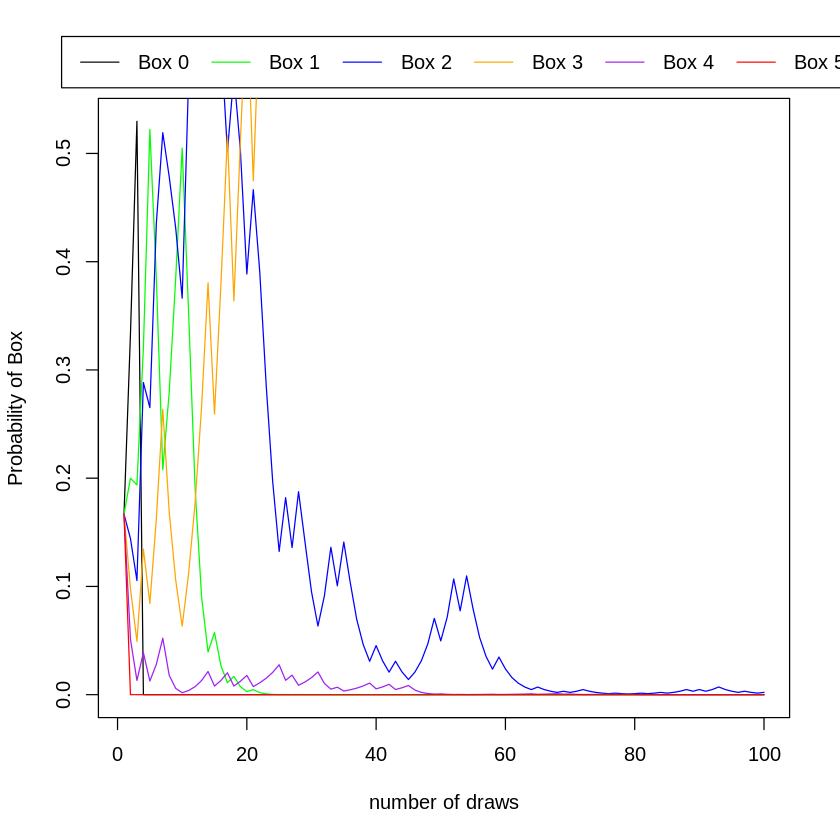

[1] "\nThe draws in order are:\n"
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


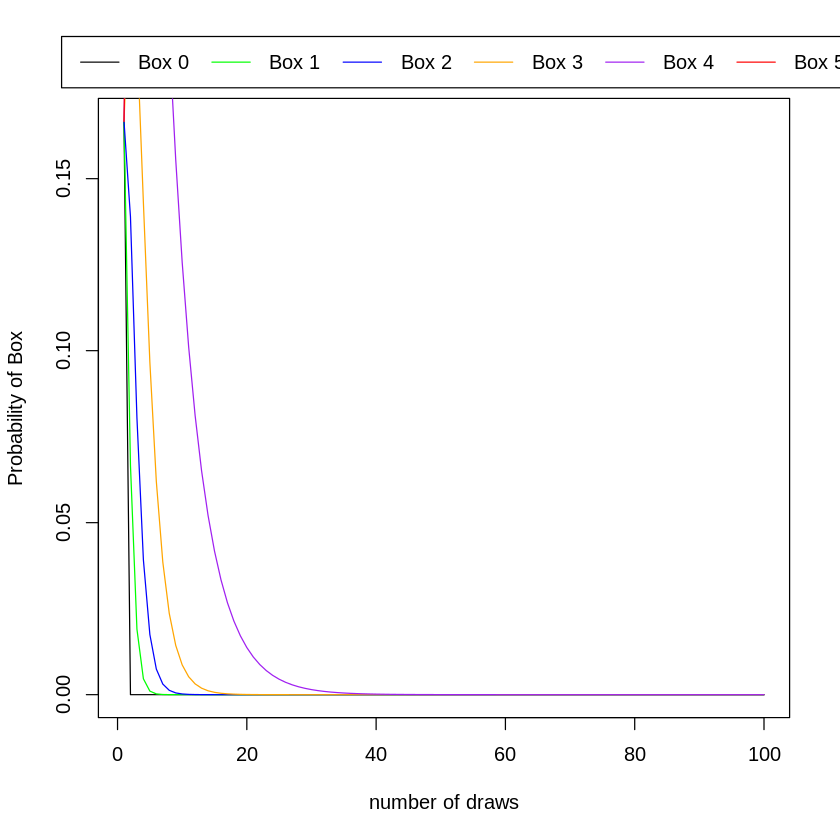

[1] "\nThe draws in order are:\n"
  [1] 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 [38] 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1
 [75] 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1


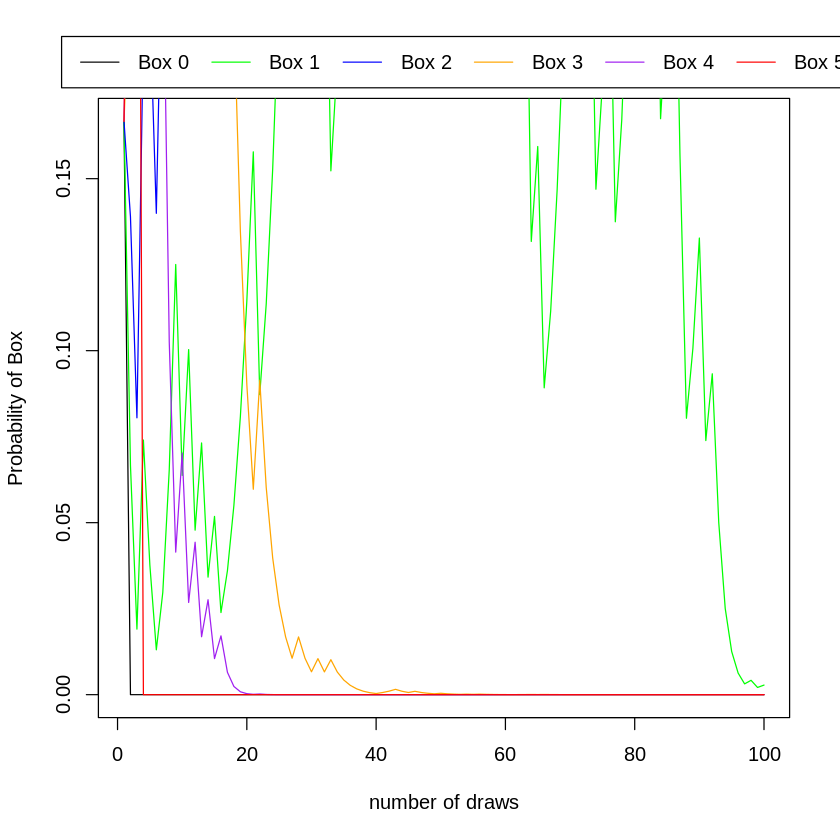

[1] "\nThe draws in order are:\n"
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


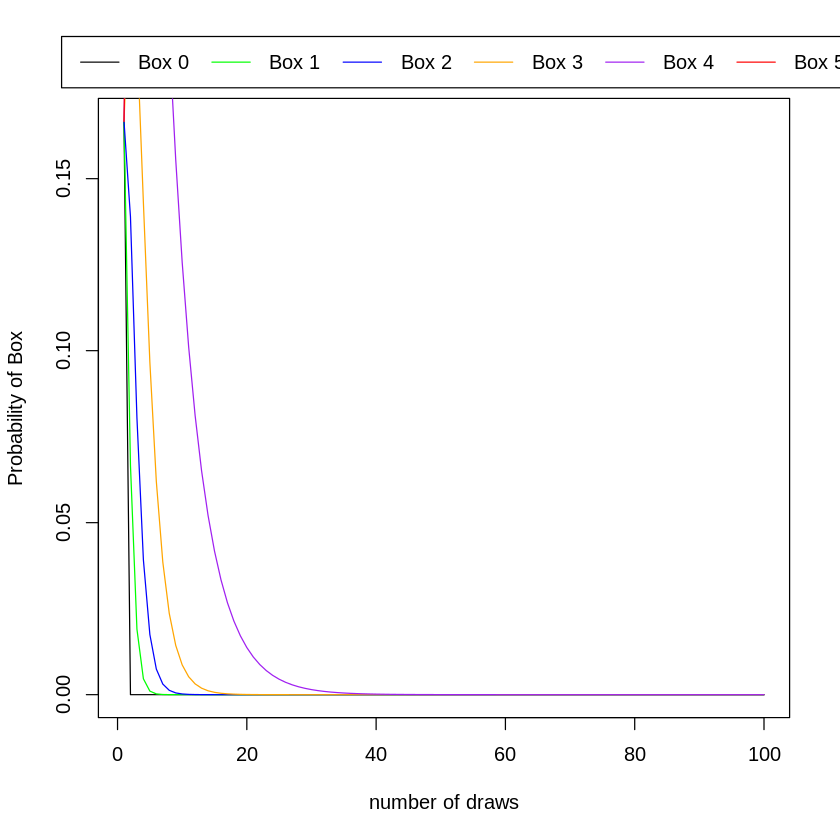

[1] "\nThe draws in order are:\n"
  [1] 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 [38] 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 [75] 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0


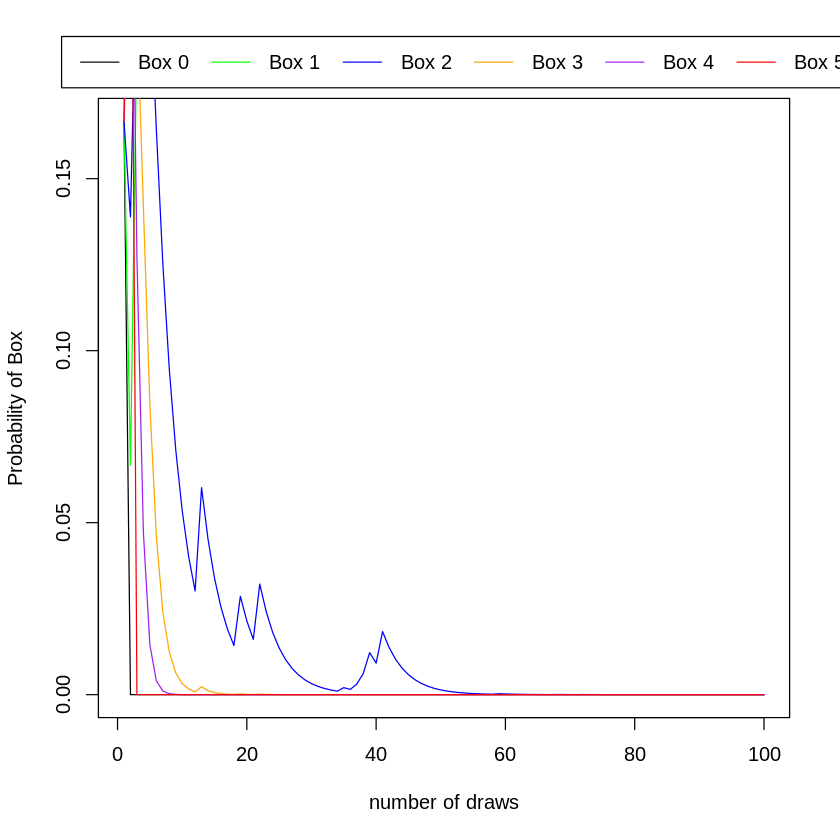

[1] "\nThe draws in order are:\n"
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


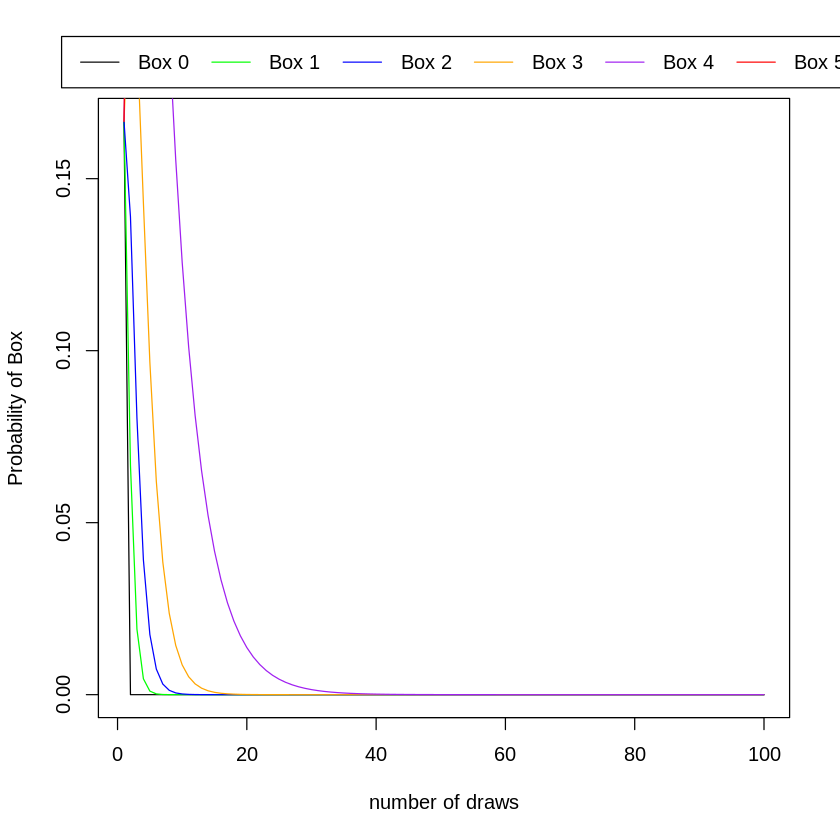

In [23]:


whichBox <- function(){
    return(sample(0:5,1))
}

whichBead <- function(box){
    rand <- runif(1)
    if (box == 0){return(1)}
    if (box == 1){if (rand<0.8){return(1)}else{return(0)}}
    if (box == 2){if (rand<0.6){return(1)}else{return(0)}}
    if (box == 3){if (rand<0.4){return(1)}else{return(0)}}
    if (box == 4){if (rand<0.2){return(1)}else{return(0)}}
    else{return(0)}
}

boxSimulation <- function(n){
        PH0 <- 1/6
        PH1 <- 1/6
        PH2 <- 1/6
        PH3 <- 1/6
        PH4 <- 1/6
        PH5 <- 1/6
        vPH0 <- vector()
        vPH1 <- vector()
        vPH2 <- vector()
        vPH3 <- vector()
        vPH4 <- vector()
        vPH5 <- vector()
        ext <- 0
        vext <- vector()
        step <- 0
        step <- 0
        box <- whichBox()
        for (ni in 1:n){
            vPH0 <- c(vPH0,PH0)
            vPH1 <- c(vPH1,PH1)
            vPH2 <- c(vPH2,PH2)
            vPH3 <- c(vPH3,PH3)
            vPH4 <- c(vPH4,PH4)
            vPH5 <- c(vPH5,PH5)

            step <- step + 1
            #cat("\nStep: ",step)
            ext <- whichBead(box)
            #print(ext)
            vext <- c(vext,ext)
            PH0 <- H0(ext)*PH0/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
            #cat("PH0: ",PH0)
            PH1 <- H1(ext)*PH1/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
            #cat("   PH1: ",PH1) 
            PH2 <- H2(ext)*PH2/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
            #cat("   PH2: ",PH2)
            PH3 <- H3(ext)*PH3/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
            #cat("   PH3: ",PH3)
            PH4 <- H4(ext)*PH4/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
            #cat("   PH4: ",PH4)
            PH5 <- H5(ext)*PH5/(H0(ext)*PH0 + H1(ext)*PH1 + H2(ext)*PH2 + H3(ext)*PH3 + H4(ext)*PH4 + H5(ext)*PH5)
            #cat("   PH5: ",PH5)
            flush.console()
        }

        p <- plot(1:step,vPH0,type = 'l', col = 'black',xlab = 'number of draws',ylab = 'Probability of Box')
        lines(1:step,vPH1, col = 'green')
        lines(1:step,vPH2, col = 'blue')
        lines(1:step,vPH3, col = 'orange')
        lines(1:step,vPH4, col = 'purple')
        lines(1:step,vPH5, col = 'red')

        print("\nThe draws in order are:\n")
        print(vext)

        legend("topright", 
               inset=-0.1, 
               legend=c("Box 0","Box 1","Box 2","Box 3","Box 4","Box 5"),
               col=c("black", "green", 'blue', 'orange', 'purple','red'), 
               lty=1:1, 
               cex=1,
               box.lty=1,
               horiz = TRUE,
               xpd=TRUE)

}

boxSimulation(100)
boxSimulation(100)
boxSimulation(100)
boxSimulation(100)
boxSimulation(100)
boxSimulation(100)